In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

import warnings
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS, FITSFixedWarning

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


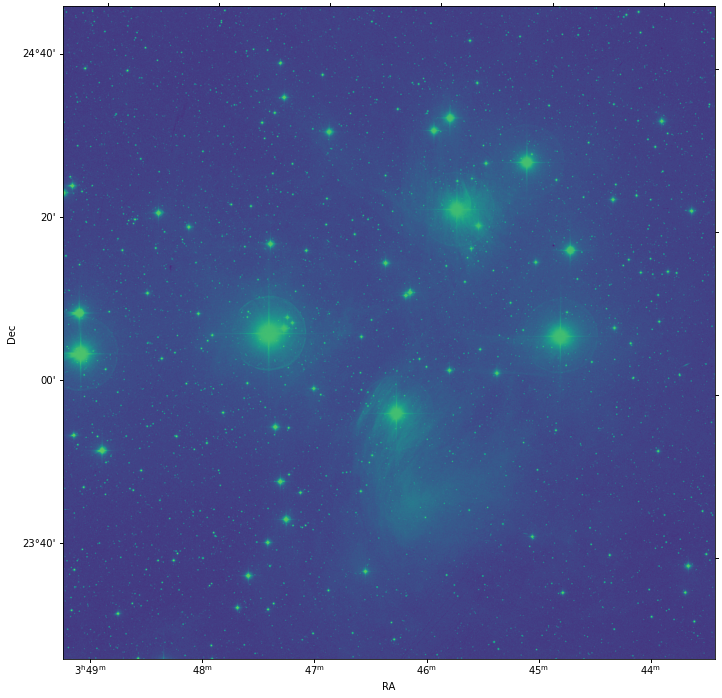

In [58]:
filename ='../data/DSS_Pleiades_large.fits'

hdu = fits.open(filename)[0]
with warnings.catch_warnings():
    # Ignore a warning on using DATE-OBS in place of MJD-OBS
    warnings.filterwarnings('ignore', message="'datfix' made the change",
                            category=FITSFixedWarning)
    wcs = WCS(hdu.header)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')

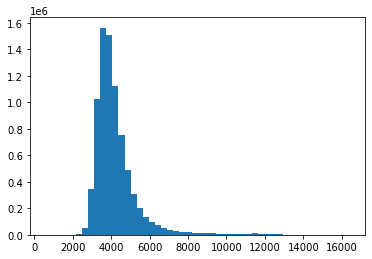

In [59]:
fix, ax = plt.subplots()
zz=ax.hist(hdu.data.flatten(), bins=50)

In [60]:
from scipy.ndimage import find_objects, label, generate_binary_structure, maximum_filter

#convd = convolve(hdu.data, np.ones((5,5))/25.0)
#img_masked = hdu.data > 22000
convd = maximum_filter(hdu.data, size=(5,5))
img_masked = convd > 13000
s = generate_binary_structure(2,2)
labeled_array, nfeatures = label(img_masked, structure=s)
print(f'Features found: {nfeatures}')
locs = find_objects(labeled_array)

Features found: 463


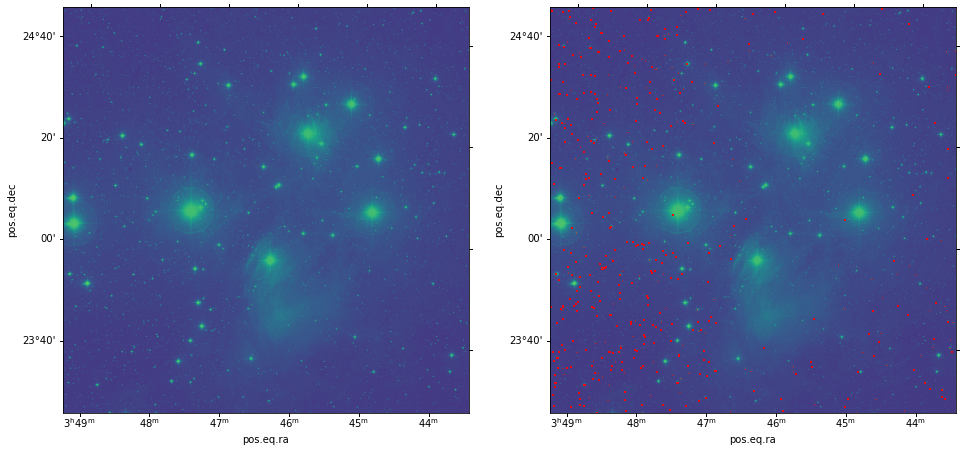

In [61]:
from  matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


rects = []
for idx in range(nfeatures):
    loc = locs[idx]
    xy = (loc[1].start, loc[0].start)
    width = loc[1].stop - loc[1].start
    height = loc[0].stop - loc[0].start
    rect = Rectangle(xy, width, height, color='red')
    rects.append(rect)

pc = PatchCollection(rects, facecolor='none', edgecolor='red')

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.add_collection(pc)

In [62]:
import sys
sys.path.append('/Users/Kevin/repos/runawaysearch-1/src')
from gaiastars import gaiastars as gs
import astropy.units as u

In [63]:
import pandas as pd
df = pd.read_csv('../data/pleiades-id.csv')
pleiades_members = df.source_id.to_list()
pleiades = gs(name='Pleiades Members', description='from Columbia Paper')
pleiades.from_source_idlist(pleiades_members)

INFO: Query finished. [astroquery.utils.tap.core]


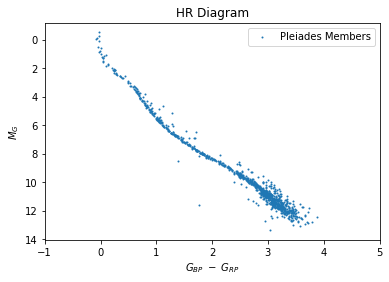

In [64]:
pleiades.plot_hrdiagram()

In [66]:
#need to clip the gaia results to fit in the image
lower_left = wcs.pixel_to_world(0,0)
upper_right = wcs.pixel_to_world(hdu.data.shape[1],hdu.data.shape[0])

#ra backwards since x-axis is reveresed
qry_str = f'ra >= {upper_right.ra.value} and ra < {lower_left.ra.value} and dec >= {lower_left.dec.value} and dec < {upper_right.dec.value}'
pleiades_clipped = pleiades.query(qry_str)
len(pleiades_clipped)

252

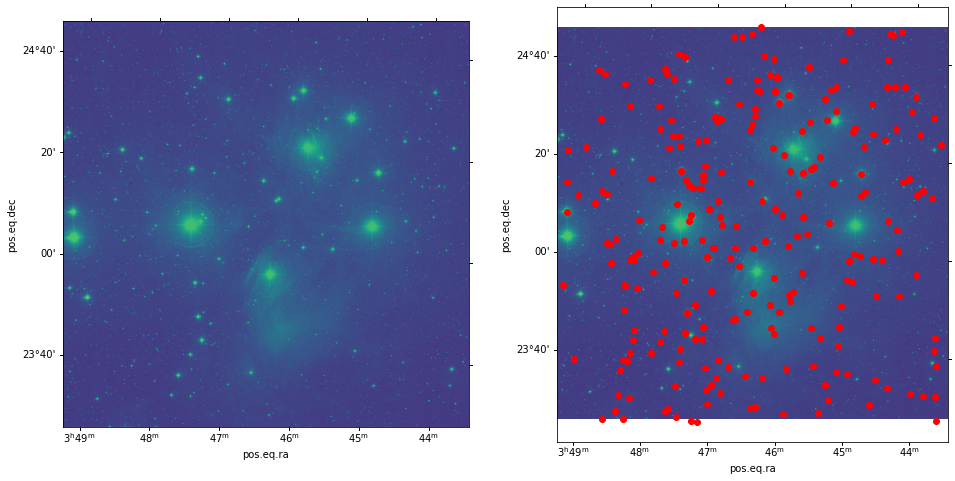

In [67]:
coords = pleiades_clipped.get_coords()
pxs = wcs.world_to_pixel(coords)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')

In [68]:
alcyone = gs(name='Alcyone', description='from Gaia Object Search')
alcyone.from_source_idlist([66714384142368256])

INFO: Query finished. [astroquery.utils.tap.core]


In [69]:
from astropy.coordinates import SkyCoord
import astropy.units as u

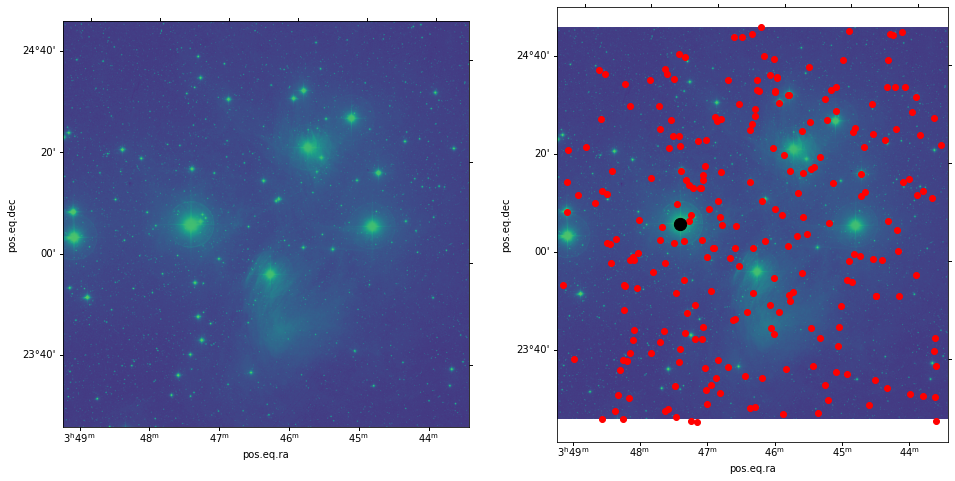

In [70]:
#alcyone_coords = alcyone.get_coords()
alcyone_coords = SkyCoord(alcyone.objs.iloc[0].ra*u.deg, alcyone.objs.iloc[0].dec*u.deg)
alcyone_pxs = wcs.world_to_pixel(alcyone_coords)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')
ax.scatter(alcyone_pxs[0], alcyone_pxs[1], color='black', s=150)

In [52]:
pleiades_biggies_ids = [66526127137440128,66529975427235712,66714384142368256,65205373152172032,
                    65271996684817280,65283232316451328, 65296907494549120]
pleiades_biggies = gs(name='Big Stars in Pleiades', description='From Wikipedia')
pleiades_biggies.from_source_idlist(pleiades_biggies_ids)

INFO: Query finished. [astroquery.utils.tap.core]


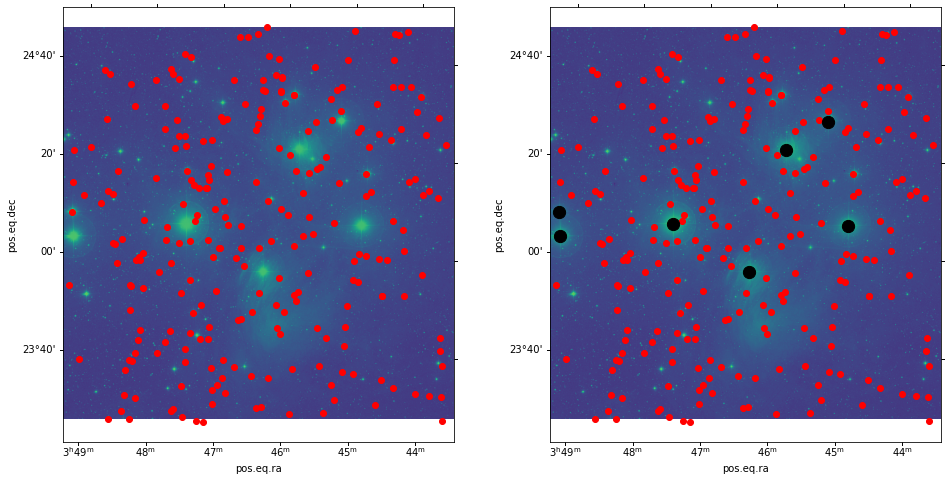

In [73]:
biggies_coords = pleiades_biggies.query(qry_str).get_coords()
biggies_pxs = wcs.world_to_pixel(biggies_coords)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')
ax.scatter(alcyone_pxs[0], alcyone_pxs[1], color='black', s=150)
ax.scatter(biggies_pxs[0], biggies_pxs[1], color='black', s=150)